In [3]:
import numpy as np                     
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns  
import math 

In [4]:
data= pd.read_csv('ETH_1H.csv',parse_dates=['Date'],index_col=['Date'])

In [5]:
data.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [6]:
data=data.sort_index()
data.head(-5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 15:00:00,1586962800000,ETHUSD,157.12,157.15,155.81,155.81,303.839541
2020-04-15 16:00:00,1586966400000,ETHUSD,155.81,157.52,155.74,157.12,430.083035
2020-04-15 17:00:00,1586970000000,ETHUSD,157.12,157.78,156.90,157.48,156.552221


In [7]:
data.isna().sum()

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
#Dropping these two rows are they are of no use

data=data.drop(columns=['Unix Timestamp','Symbol'])

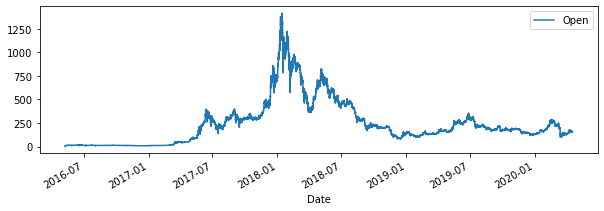

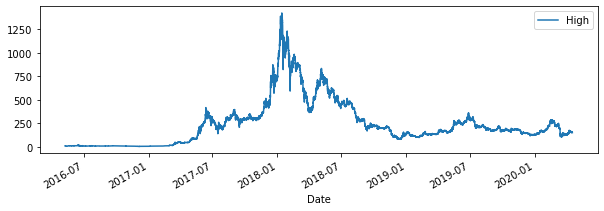

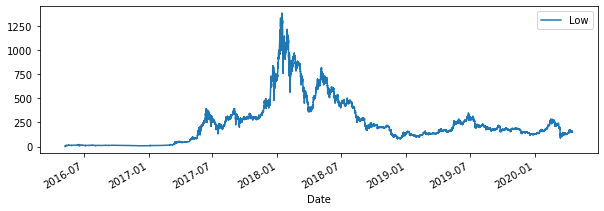

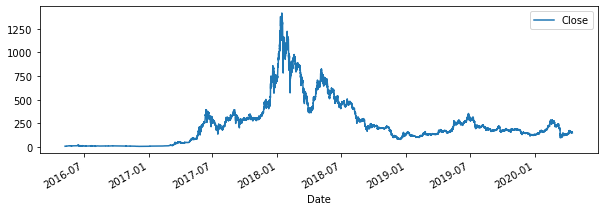

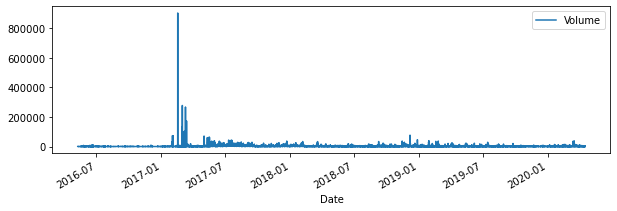

In [10]:
for i in data:
    plt.figure(figsize=(10,3))
    data[i].plot(legend=i)
    plt.show()

In [11]:
#creating of datetime features
def create_f(df):
    df=df.copy()
    df['hour']=df.index.hour
    df['day']=df.index.day
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofweek']=df.index.dayofweek
    df['dayofyear']=df.index.dayofyear
    df['weekofyear']=df.index.isocalendar().week
    
    return df

In [12]:
df = create_f(data)
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<AxesSubplot:>

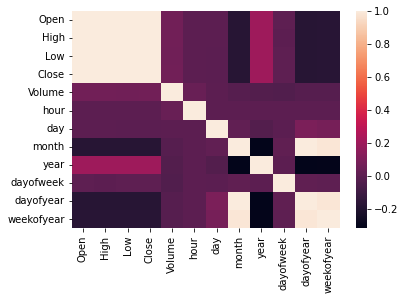

In [13]:
sns.heatmap(df.corr())

In [14]:
#generating a window to predict the 25th hour


close=df.iloc[:,3]
windows=[]
target=[]
length=240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length]
    y= close.iloc[i+length]
    windows.append(x)
    target.append(y)
    
windows=np.array(windows)
target=np.array(target).reshape(-1,1)
    

In [15]:
#creating train and test data
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
windows_sc = sc.fit_transform(windows)
target_sc = sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [24]:
#splitting
#80% for training data,20% for testing data

split= int(0.8*len(windows_sc))

x_train=windows_sc[:split,:,:]
x_test=windows_sc[split:,:,:]
y_train=target_sc[:split,:]
y_test=target_sc[split:,:]

print(x_train.shape,y_train.shape)

(27405, 240, 1) (27405, 1)


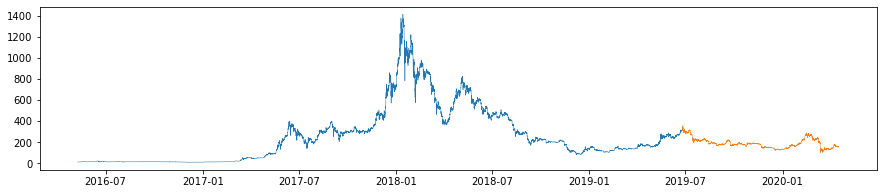

In [25]:
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:split],label='Train',linewidth=0.5)
plt.plot(df['Close'][split:],label='Test',linewidth=0.5)

#blue=training data, orange=testing data

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import *

In [27]:
model = Sequential()
model.add(LSTM(100,input_shape=(x_train.shape[1],x_train.shape[2])))#100 neurons
model.add(Dropout(0.2)) #20% lowest contibuting neuron will be dropped
model.add(Dense(1,activation='linear'))#1 neuron, this is the output layer

model.compile(optimizer='adam',loss='mse')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train,y_train,epochs=5, batch_size=100,verbose=1)#epoch specifies the number of complete passes of a training dataset

Epoch 1/5
275/275 [==============================] - 131s 469ms/step - loss: 0.0020
Epoch 2/5
275/275 [==============================] - 138s 501ms/step - loss: 2.7808e-04
Epoch 3/5
275/275 [==============================] - 114s 413ms/step - loss: 2.6438e-04
Epoch 4/5
275/275 [==============================] - 116s 424ms/step - loss: 2.2388e-04
Epoch 5/5
275/275 [==============================] - 123s 448ms/step - loss: 2.1501e-04


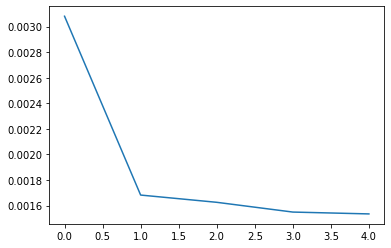

In [22]:
plt.plot(model.history.history['loss'])

In [31]:
pred_sc = model.predict(x_test)
pred = sc.inverse_transform(pred_sc)
y_test_ic = sc.inverse_transform(y_test)

The coefficient of determination (R-squared) = 0.979


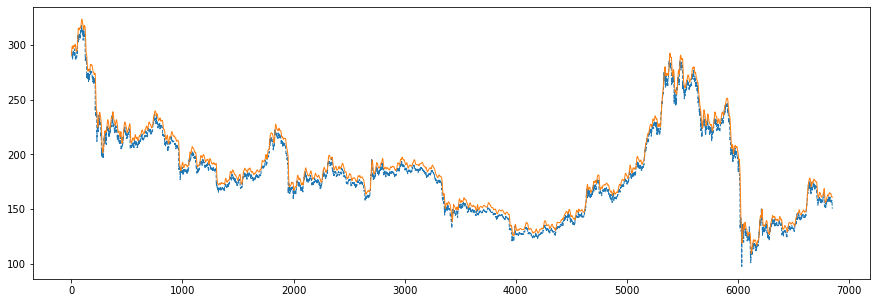

In [32]:
print('The coefficient of determination (R-squared) = {:.3f}'.format(r2_score(pred,y_test_ic)))

plt.figure(figsize=(15,5))
plt.plot(y_test_ic,'--',label='Actual',linewidth=1)
plt.plot(pred,label='Predicted',linewidth=1)

#actul values in blue, predicted values in orange

FUTURE PREDICTION

In [33]:
model = Sequential()
model.add(LSTM(100,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [34]:
#training on the entire dataset

x=windows_sc
y=target_sc

model.fit(x,y,epochs=5,batch_size=100,verbose=1)

Epoch 1/5
343/343 [==============================] - 76s 218ms/step - loss: 7.8712e-04
Epoch 2/5
343/343 [==============================] - 83s 243ms/step - loss: 2.0658e-04
Epoch 3/5
343/343 [==============================] - 85s 248ms/step - loss: 1.8297e-04
Epoch 4/5
343/343 [==============================] - 89s 258ms/step - loss: 1.6632e-04
Epoch 5/5
343/343 [==============================] - 88s 256ms/step - loss: 1.5463e-04


In [35]:
from datetime import datetime
from tqdm import tqdm

str_d1 = '2020/04/16'
str_d2 = '2020/04/30'

#converting string to date 
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")

delta = d2-d1
steps_in_future = delta.days * 24
print("Steps in future: ",steps_in_future)

Steps in future:  336


In [40]:
#iterative prediction of each future step

f_wind=windows_sc[-1]
f_tar=target_sc[-1]
new=[]

for i in tqdm(range(steps_in_future)):
    curr =np.append(f_wind[1:],[f_tar]).reshape(-1,1)
    #print(curr,end="\n\n")
    next_pred =  model.predict(curr.reshape(1,length,1))
    #pred_ic = sc.inverse_transform(next_pred)
    new.append(next_pred[0][0])
    f_wind = curr
    f_tar = next_pred
                                            

100%|██████████| 336/336 [00:49<00:00,  6.83it/s]


In [41]:
new = sc.inverse_transform(np.array(new).reshape(-1,1))

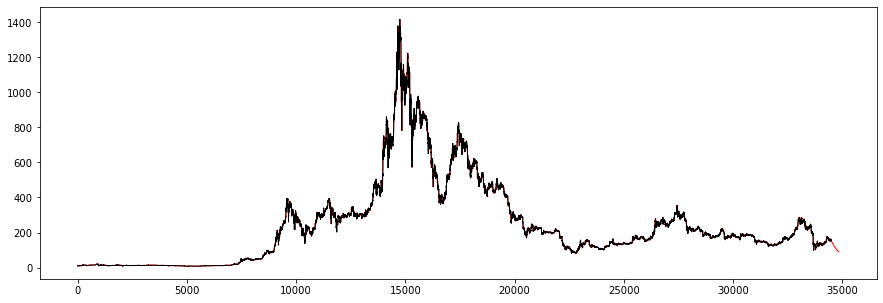

In [42]:
out = []
out = np.append(df.Close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.Close.values,linewidth=1,color='black')
plt.show()